In [2]:
import pandas as pd

In [3]:
df_ingredients = pd.read_json('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/key_ingredients/train.json')
df_ingredients.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
df_recipes_RAW = pd.read_csv('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/recipe_list/RAW_recipes.csv')
df_recipes_RAW.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
df_interactions_RAW = pd.read_csv('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/recipe_list/RAW_interactions.csv')
df_interactions_RAW.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [28]:
recipe_df = df_interactions_RAW[['recipe_id','rating']]
recipe_df

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5
...,...,...
1132362,72730,0
1132363,386618,5
1132364,78003,5
1132365,78003,4


In [29]:
rating_df = recipe_df.groupby(by='recipe_id').mean().head()

In [30]:
more_info = df_recipes_RAW[['id','n_ingredients','minutes','n_steps']].set_index('id')

In [31]:
pd.merge(rating_df,more_info,how='left',left_index=True, right_index=True)

,rating,n_ingredients,minutes,n_steps
recipe_id,,,,
38,4.250000,4,1485,13
39,3.000000,26,265,17
40,4.333333,6,35,8
41,4.500000,15,1460,18
43,1.000000,15,140,35


<AxesSubplot:xlabel='rating', ylabel='Count'>

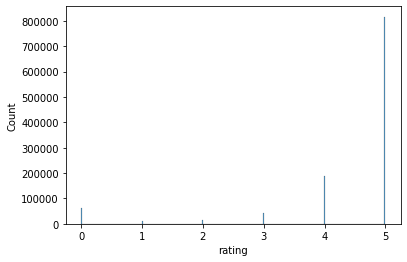

In [24]:
import seaborn as sns
df_interactions_RAW['rating'].unique()

sns.histplot(df_interactions_RAW['rating'])

In [13]:
tags = df_recipes_RAW[['tags','description']]

In [21]:
tags.head()
tags.loc[0,'tags']

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [23]:
tags.loc[1,'description']

'this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.'

In [ ]:
df_recipes = pd.read_csv('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/recipe_list/PP_recipes.csv')
df_recipes.head()

In [7]:
df_pickle = pd.read_pickle('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/recipe_list/ingr_map.pkl')
df_pickle

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [ ]:
ingredients_clean = df_pickle[['id','replaced','count','raw_ingr']]
ingredients_clean.head()

In [ ]:
final_df = pd.read_csv('/Users/giancarlotissot/code/mariliabreis/ingredient_matching/raw_data/final_df.csv')
final_df.head()

In [ ]:
def get_id(ingredient_str):
    ingredient_id = ingredients_clean[ingredients_clean['raw_ingr'] ==ingredient_str]
    ingredient_id.reset_index(inplace=True)
    return ingredient_id.loc[0,'id']

In [ ]:
result = get_id('romaine lettuce leaf')
result

In [ ]:
def find_match(ingredient_id):
    final_df
    
def find_total(ingredient):
    
    

In [ ]:
# recipe_clean = df_recipes[['id','ingredient_ids']]
# recipe_clean.head()
# recipe_clean.merge()

In [ ]:
df_recipes.info()

In [ ]:
id = 59389
test = df_recipes[df_recipes['id'] == id]
test['ingredient_ids']

In [ ]:
id = 1170
test = df_pickle[df_pickle['id'] == id]
test

In [ ]:
batata = df_recipes[df_recipes['id'] == id]
batata
batata_raw = df_recipes_RAW[df_recipes_RAW['id'] == id]
batata_raw

In [ ]:
batata_strlist = batata.ingredient_tokens.to_list()

In [ ]:
# ingredients_array = []
# ast.literal_eval(batata_strlist[0])
# for lista in ast.literal_eval(batata_strlist[0]):
#     print(lista)
#     ingredients_array += lista

# print(ingredients_array)

In [ ]:
print(batata_raw.loc[3,'ingredients'])

In [ ]:
print(batata_raw.loc[3,'steps'])

In [ ]:
df_recipes_RAW[['ingredients']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(texts)

X.toarray()